# 📊 EMNIST Model Analysis & Visualization

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from tensorflow.keras.models import load_model
import seaborn as sns
import random
import string

In [4]:
# Label map for EMNIST ByClass
label_map = list(string.digits + string.ascii_uppercase + string.ascii_lowercase)
# Load the saved model
model = load_model("EMNIST_V1_model.h5")  # Replace with your .h5 filename

# Load EMNIST-like data (for demo, using MNIST here)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

## 🔍 Random Sample and Grayscale Visualization

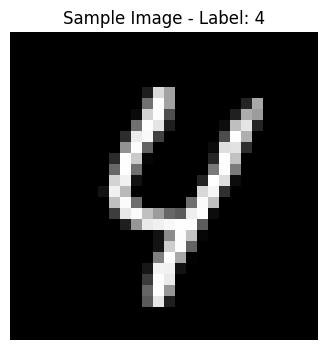

In [5]:
idx = random.randint(0, len(x_test))
plt.figure(figsize=(4, 4))
plt.imshow(x_test[idx].squeeze(), cmap='gray')
plt.title(f"Sample Image - Label: {y_test[idx]}")
plt.axis('off')
plt.show()


## 🧠 Model Evaluation

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
eval_result = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {eval_result[1]*100:.2f}%")


313/313 - 2s - 6ms/step - accuracy: 0.9226 - loss: 0.2615
Test Accuracy: 92.26%


## 📷 Sample Predictions (25 Images) [0-9]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


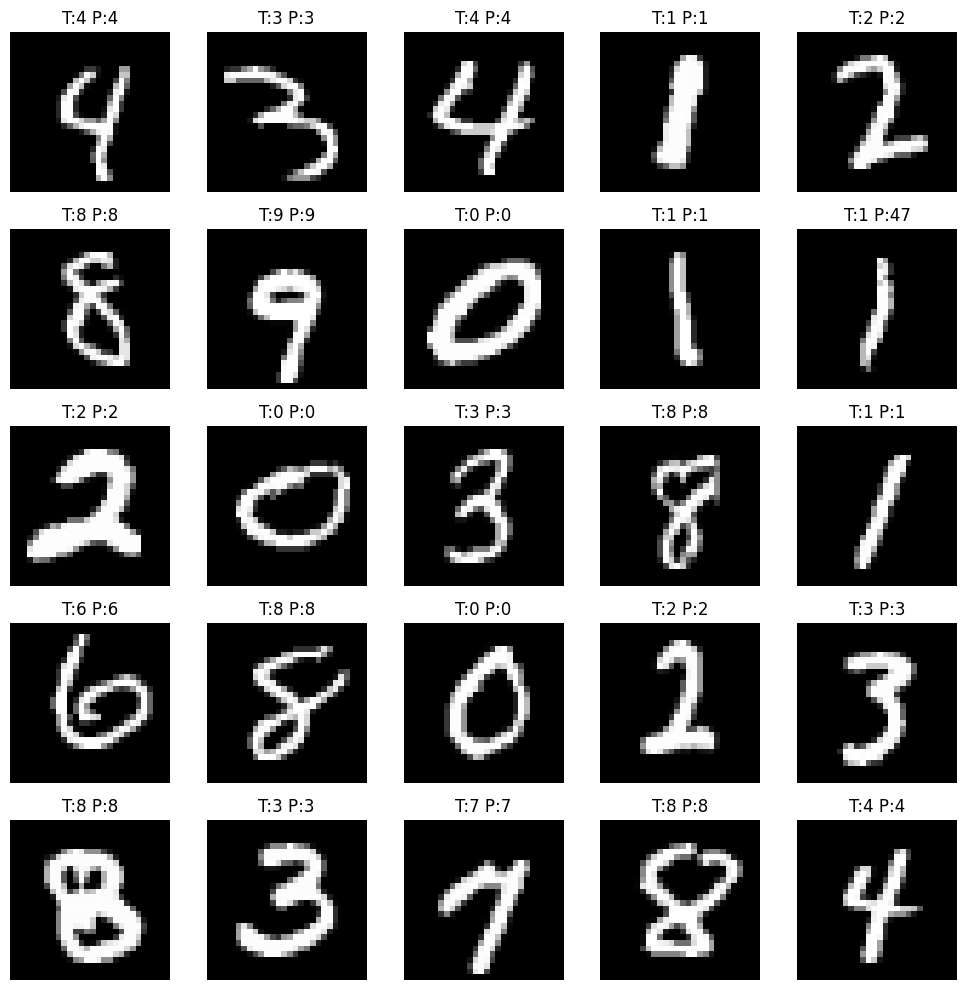

In [7]:

preds = model.predict(x_test)
pred_labels = np.argmax(preds, axis=1)

plt.figure(figsize=(10, 10))
for i in range(25):
    idx = random.randint(0, len(x_test)-1)
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[idx].squeeze(), cmap='gray')
    plt.title(f"T:{y_test[idx]} P:{pred_labels[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## 📈 Accuracy and Loss Plot

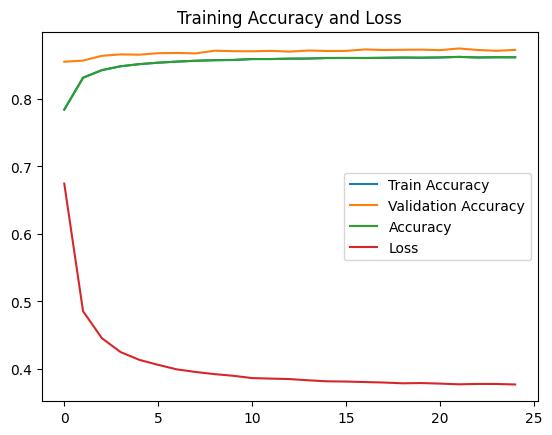

Skipped: This assumes training history is available.


In [8]:
# Import History
import pickle
with open('EMNIST_V1_history.pkl', 'rb') as f:
    history_data = pickle.load(f)
# Now you can plot:
plt.plot(history_data['accuracy'], label='Train Accuracy')
plt.plot(history_data['val_accuracy'], label='Validation Accuracy')

plt.plot(history_data['accuracy'], label='Accuracy')
plt.plot(history_data['loss'], label='Loss')
plt.legend()
plt.title("Training Accuracy and Loss")
plt.show()

print("Skipped: This assumes training history is available.")


## Text - String

In [16]:

# Load model
model = load_model('EMNIST_V1_model.h5')
# Load EMNIST test dataset [a-z A-Z]
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/byclass',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

# Preprocess function
def preprocess(image, label):
    image = tf.image.resize_with_pad(image, 28, 28)
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.expand_dims(image, axis=-1)  # Ensure (28,28,1)
    return image, label

# Prepare the test dataset
ds_test = ds_test.map(preprocess).batch(256).prefetch(tf.data.AUTOTUNE)

# Collect predictions and labels
all_preds, all_labels = [], []

for images, labels in ds_test:
    try:
        preds = model.predict(images, verbose=0)
        all_preds.extend(np.argmax(preds, axis=1))
        all_labels.extend(labels.numpy())
    except Exception as e:
        print("Prediction error on batch:", e)

# Convert to numpy
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Overall Accuracy: {accuracy*100:.4f}%")   # e.g. 92.31 %

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

Overall Accuracy: 10.9841%


## 🔁 Confusion Matrix

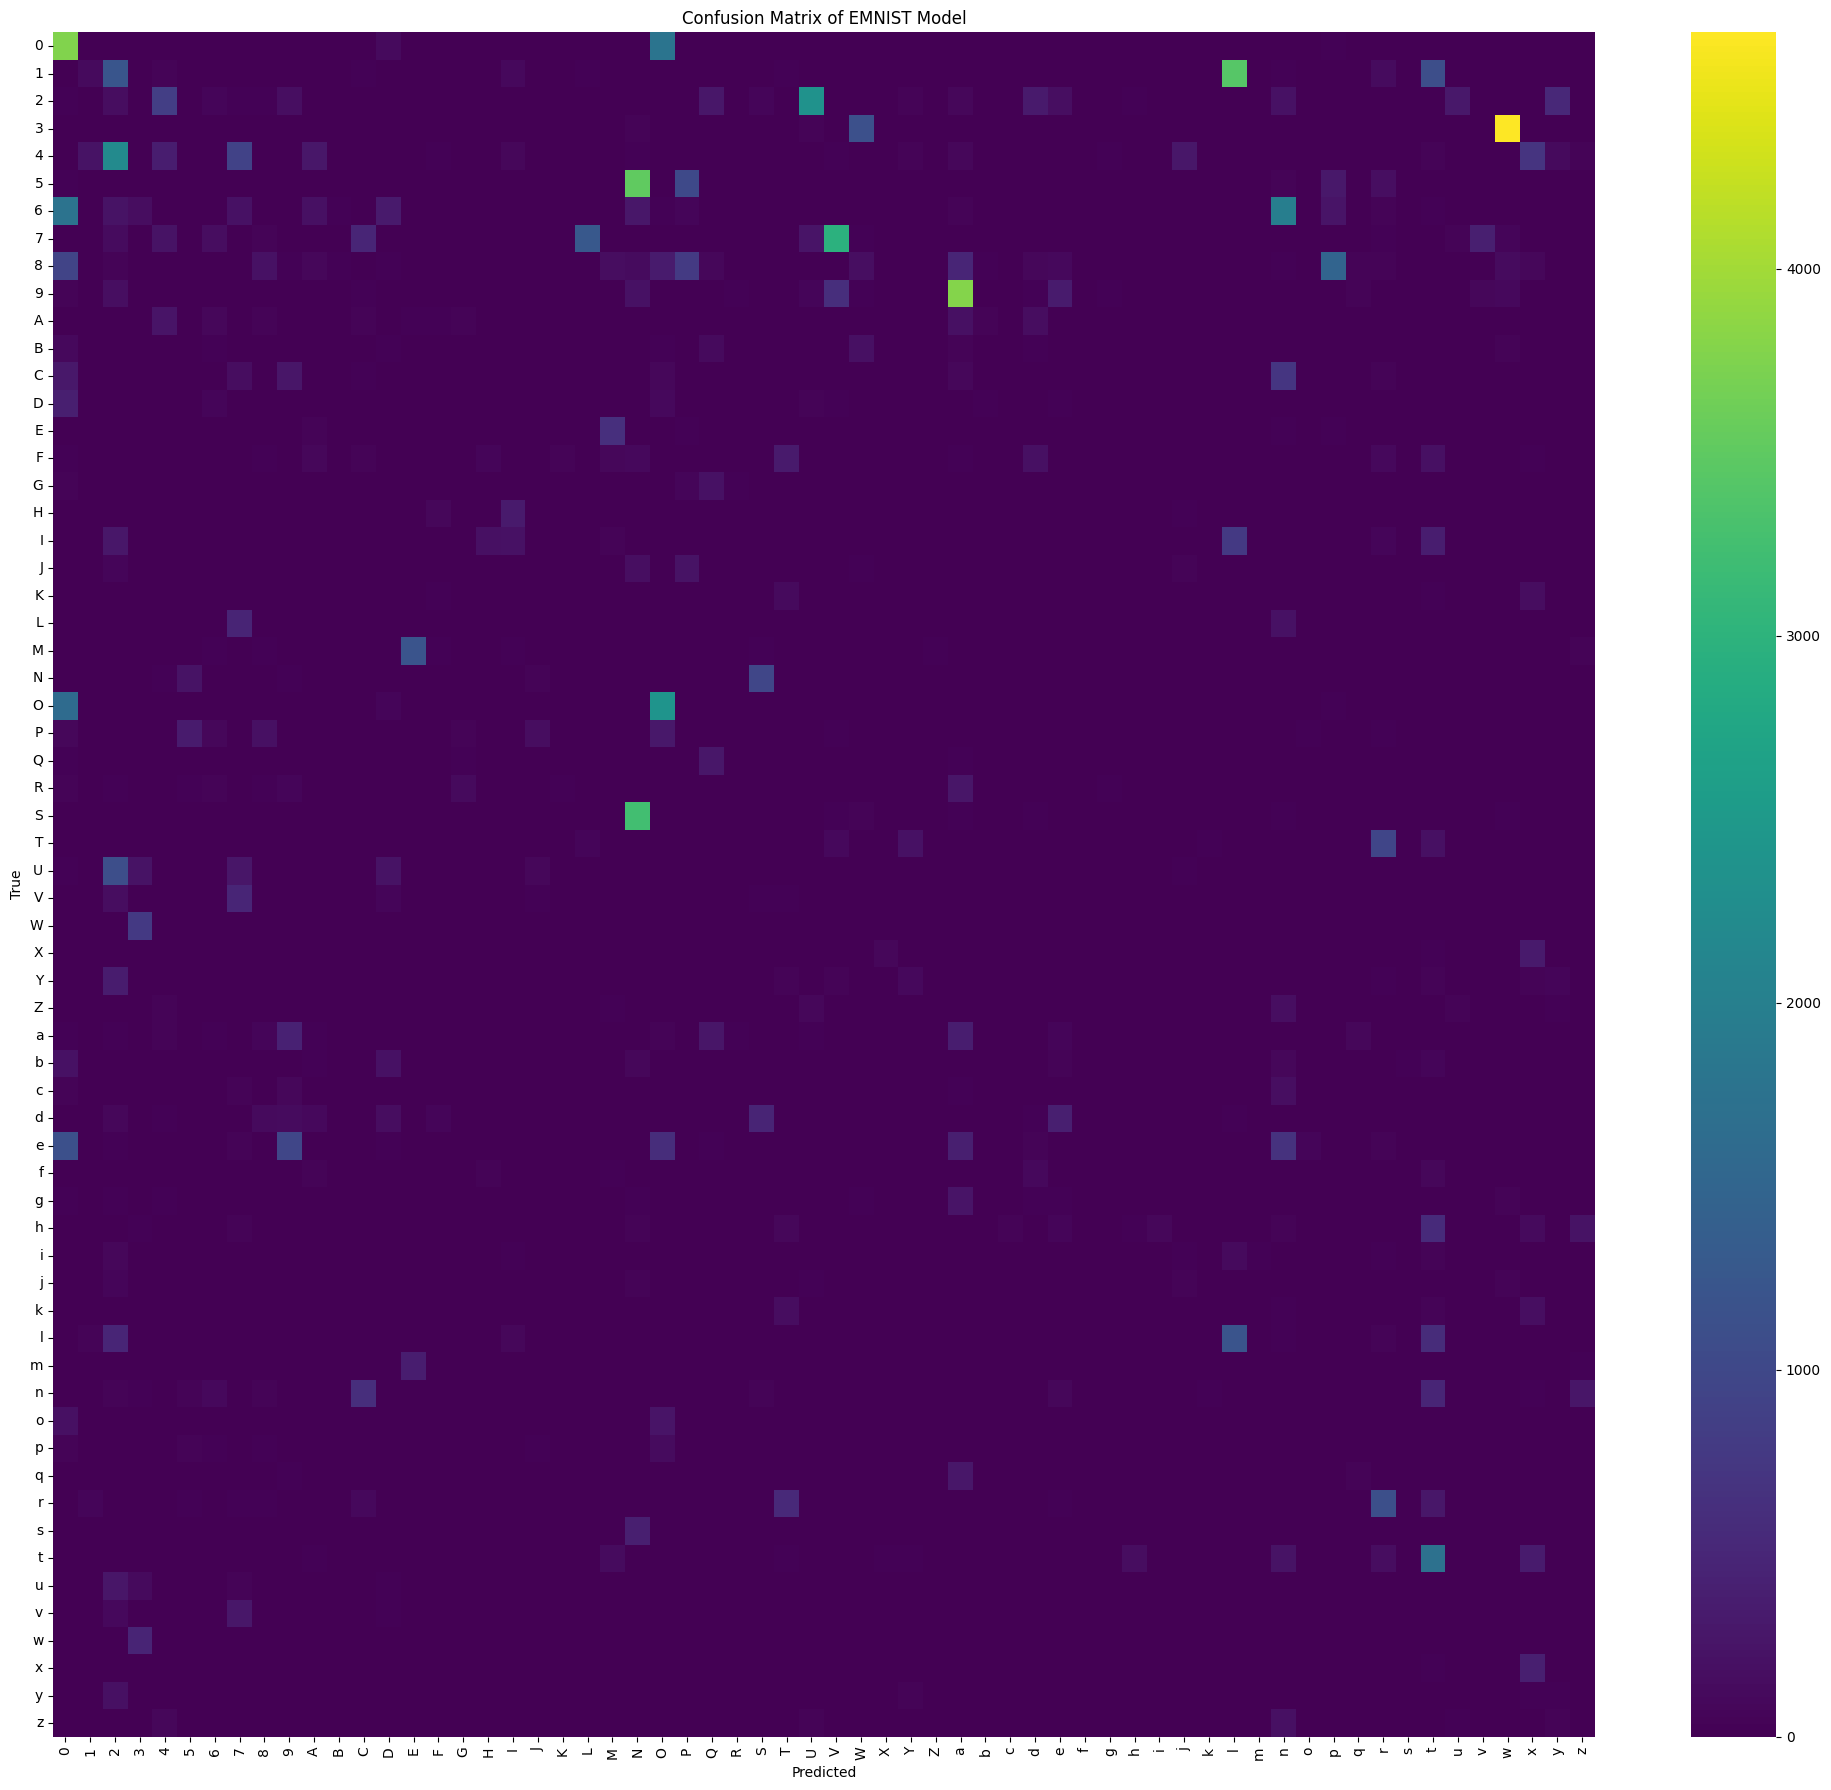

In [10]:
plt.figure(figsize=(20, 18))
sns.heatmap(cm, cmap="viridis", xticklabels=label_map, yticklabels=label_map, annot=False, fmt="d")
plt.title("Confusion Matrix of EMNIST Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 🔁 16 Sample Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


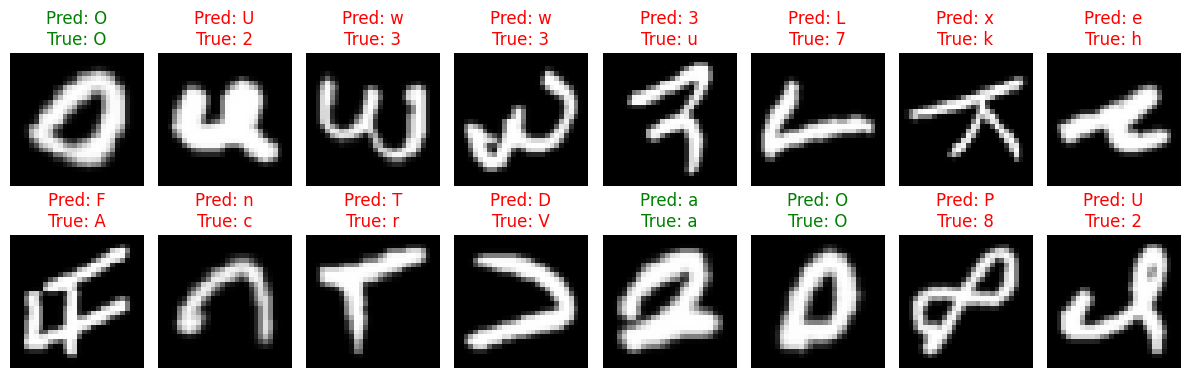

In [11]:
# Sample predictions
def plot_samples(num=16):
    ds_vis = ds_test.unbatch().take(num)
    plt.figure(figsize=(12, 4))
    for i, (img, label) in enumerate(ds_vis):
        pred = model.predict(img[None, ...])
        pred_label = np.argmax(pred)
        plt.subplot(2, num//2, i+1)
        plt.imshow(img.numpy().reshape(28, 28), cmap='gray')
        color = "green" if pred_label == label else "red"
        plt.title(f"Pred: {label_map[pred_label]}\nTrue: {label_map[label]}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_samples(16)

## 🔁 Class Accuracy

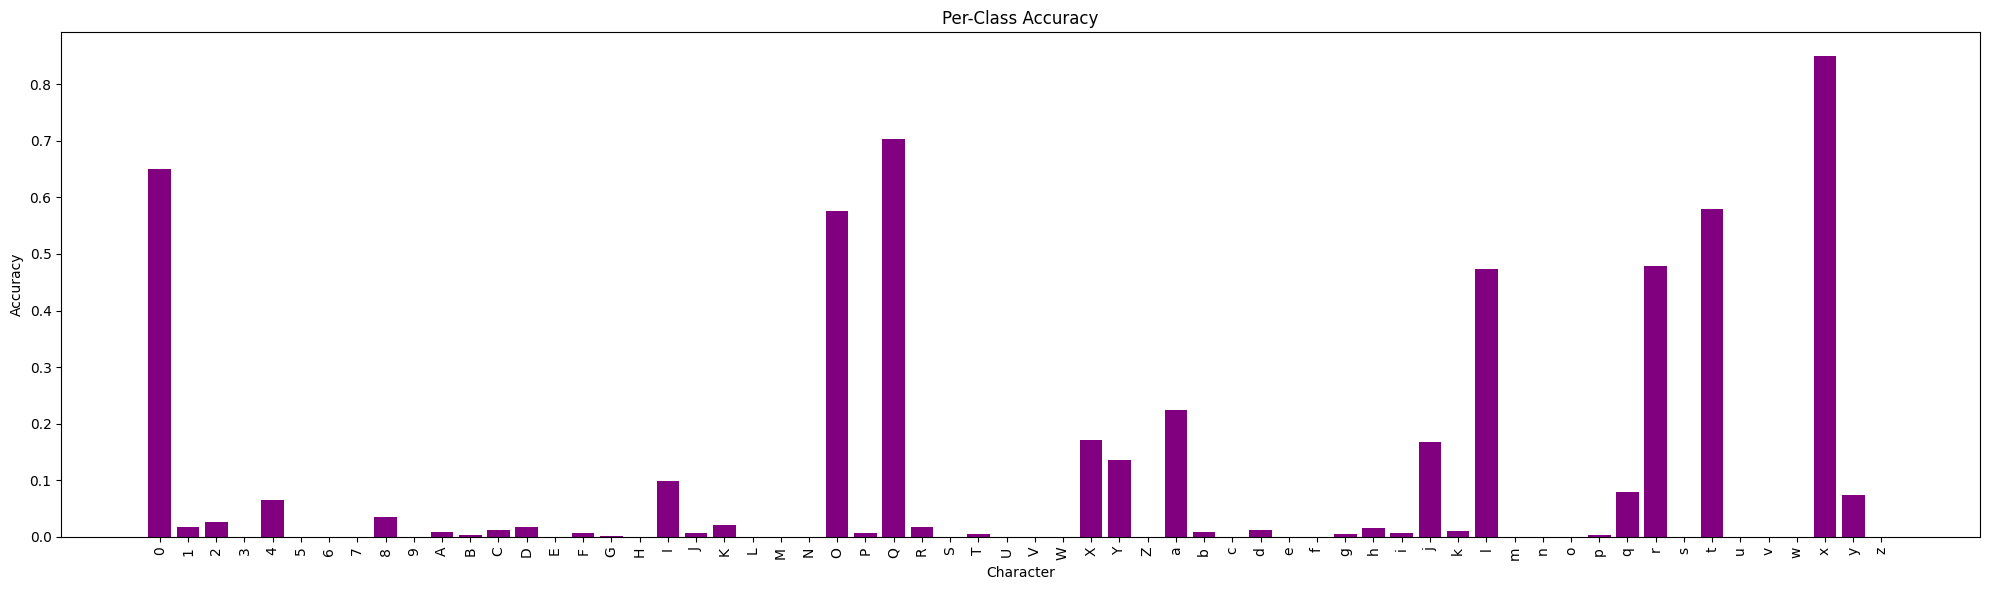

In [12]:
# Per-class accuracy
per_class_acc = cm.diagonal() / cm.sum(axis=1)
plt.figure(figsize=(20, 6))
plt.bar(range(len(label_map)), per_class_acc, color='purple')
plt.xticks(ticks=range(len(label_map)), labels=label_map, rotation='vertical')
plt.title("Per-Class Accuracy")
plt.xlabel("Character")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

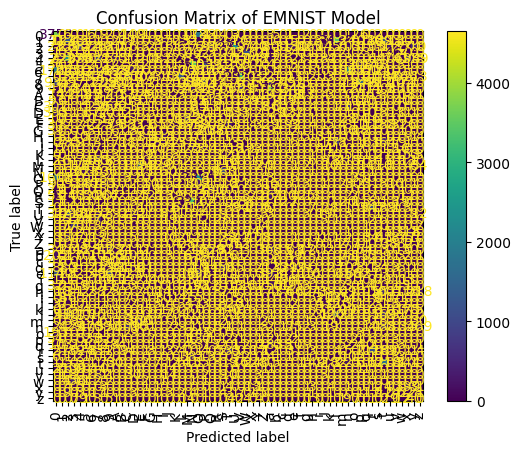

In [13]:
 

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_map)

plt.figure(figsize=(20, 20))   # Set figure size here
disp.plot(xticks_rotation=90, cmap='viridis')  # Optional: better colormap
plt.title("Confusion Matrix of EMNIST Model")
plt.show()

## 🔝 Top 10 Confused Pairs

In [14]:

# Most confused pairs
confused = (cm - np.eye(len(label_map)) * cm.max()).astype(int)
confused_pairs = []
for i in range(len(label_map)):
    top_confused = np.argsort(confused[i])[::-1][:3]
    for j in top_confused:
        if confused[i, j] > 0:
            confused_pairs.append((label_map[i], label_map[j], confused[i, j]))

# Sort and display top confusion cases
confused_pairs = sorted(confused_pairs, key=lambda x: -x[2])[:10]
print("\nTop 10 Confused Pairs:")
for actual, predicted, count in confused_pairs:
    print(f"{actual} -> {predicted} : {count} times")



Top 10 Confused Pairs:
3 -> w : 4644 times
9 -> a : 3786 times
5 -> N : 3515 times
1 -> l : 3426 times
S -> N : 3247 times
7 -> V : 2959 times
2 -> U : 2353 times
4 -> 2 : 2209 times
6 -> n : 1961 times
0 -> O : 1788 times
